In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [6]:
df = pd.read_excel('Oil Price History.xlsx',sheetname='2010 Prices Python')


In [7]:
df.describe()

,Oil Price,Units Sold MC205
count,30.000000,30.000000
mean,51.917000,79.100000
std,10.954843,77.578592
min,29.780000,2.000000
25%,45.430000,26.750000
50%,50.420000,40.500000
75%,58.677500,123.500000
max,74.030000,254.000000


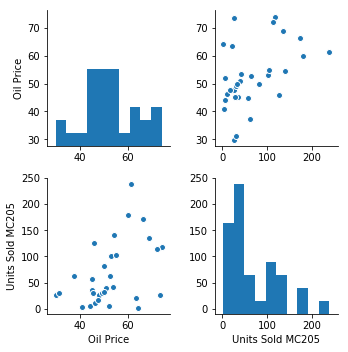

In [6]:
sns.pairplot(df)

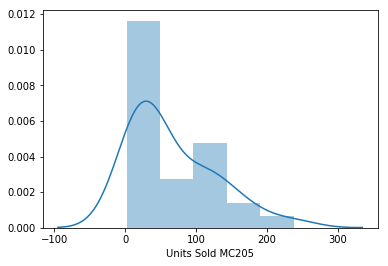

In [7]:
sns.distplot(df['Units Sold MC205'])

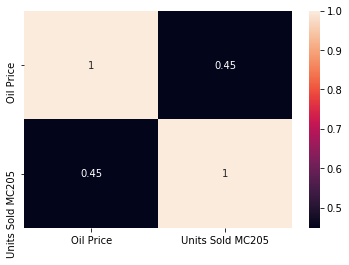

In [8]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.columns

Index(['Time', 'Oil Price', 'Units Sold MC205'], dtype='object')

In [9]:
x= df[['Oil Price']]

In [10]:
y= df['Units Sold MC205']

In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\rpark.CVC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(lm.intercept_)

-129.300270918


In [17]:
lm.coef_

array([ 4.14689806])

In [18]:
x_train.columns

Index(['Oil Price'], dtype='object')

In [19]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

In [20]:
cdf

,Coeff
Oil Price,4.146898


In [21]:
predictions = lm.predict(x_test)

In [22]:
predictions

array([  90.27798123,  145.34878743,   56.8125139 ,   68.3408905 ,
         25.54490255,  155.96484646,  136.80617743,   77.58847317,
        133.86187981,  175.20645345,   58.38833517,   39.68582493])

In [23]:
y_test

20    131
24    222
7      57
18     35
2      62
27    135
26      2
16     91
25     21
28    166
10     29
3       6
Name: Units Sold MC205, dtype: int64

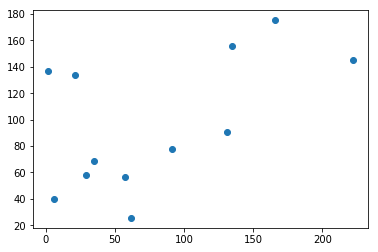

In [24]:
plt.scatter(y_test,predictions)

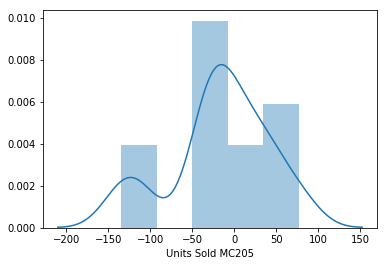

In [25]:
sns.distplot((y_test-predictions))

In [26]:
from sklearn import metrics

In [27]:
metrics.mean_absolute_error(y_test,predictions)

45.14014578840613

In [28]:
metrics.mean_squared_error(y_test,predictions)

3632.282209952014

In [29]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

60.268418014346565

In [8]:
df = pd.read_excel('WTI.xlsx',sheetname='2017')

In [11]:
df.head()

,Price,Qty
0,52.50,59
1,53.47,267
2,49.33,49
3,51.06,22
4,48.48,91


In [14]:
x = df['Price']
y = df['Qty']

In [10]:
df.drop('Date',axis=1,inplace=True)